In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
beer=pd.read_csv('C:/Users/anusha/Downloads/beer_data.csv')

In [172]:
beer.shape

(475984, 3)

In [173]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [174]:
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [175]:
# Unique Number of Beers
len(beer['beer_beerid'].drop_duplicates())

40308

In [176]:
# Unique Number of users
len(beer['review_profilename'].drop_duplicates())

22498

In [177]:
# The below command lists all duplicate records by beerid & review_profilename
# except for the last occurrence

# Since we dont have any column indicating which one of those duplicate record is latest rating, 
# we assume the last occurrence is the latest rating. Hence in this step we can view all duplicate
# records except the last occurrence

beer[beer.duplicated(['beer_beerid','review_profilename'],keep='last')]

,beer_beerid,review_profilename,review_overall
1234,52211,AleWatcher,5.0
2300,73647,barleywinefiend,4.5
2348,14243,northyorksammy,2.5
2607,1122,Slatetank,4.0
2873,1121,kenito799,3.5
3262,962,RedDiamond,3.5
3331,961,Offa,4.0
4083,175,smibroncos,4.0
4265,2717,UnionMade,4.0
4719,5756,Jason,4.5


In [178]:
# Check for duplicate records for one of the beer id
beer[beer['beer_beerid']==52211].sort_values(by='review_profilename').head()
# We can see 52211 beerid has two ratings by same user AleWatcher. We will retain the record with
# index 1248 and drop record with index 1234 as we are retaining the latest occurrence only
# for a beer & user combination.

,beer_beerid,review_profilename,review_overall
1248,52211,AleWatcher,3.5
1234,52211,AleWatcher,5.0
1251,52211,Alieniloquium,3.5
1216,52211,Beejay,3.0
1254,52211,BeerBuckeye,4.0


In [179]:
# Drop the duplicates - combination of beer and user name, except for the last occurrence
beer_nodup=beer.drop_duplicates(['beer_beerid','review_profilename'],keep='last')
beer_nodup.shape

# We can see the number of rows has decreased from 475404 to 474560

(474560, 3)

In [180]:
# We can see that for combination of 52211 beer and user AleWatcher, the record with index 1234 got
# dropped and record with index 1248 is retained.

beer_nodup[beer_nodup['beer_beerid']==52211].sort_values(by='review_profilename').head()

,beer_beerid,review_profilename,review_overall
1248,52211,AleWatcher,3.5
1251,52211,Alieniloquium,3.5
1216,52211,Beejay,3.0
1254,52211,BeerBuckeye,4.0
1226,52211,ClockworkOrange,4.0


In [181]:
group=beer_nodup[['beer_beerid','review_profilename']].groupby(['beer_beerid']).count()
group.rename(columns={'review_profilename':'review count'},inplace=True)
group.sort_values(by='review count',ascending=False)

# Beer id 2093 has the higest value of distinct users who have provided review i.e 977. 

,review count
beer_beerid,
2093,977
412,966
1904,902
1093,840
92,812
4083,798
276,788
7971,778
88,755


In [182]:
#plt.figure(figsize=(12, 8))
#sns.countplot(x='beer_beerid',data=beer_nodup,order=beer_nodup['beer_beerid'].value_counts().index)
#plt.show()

# Figure out an appropriate value of N

In [183]:
# Below table shows that max no. of reviews for a beer is 977 whereas 75% of beers have only upto 5 reviews.
group.describe()

,review count
count,40308.000000
mean,11.770914
std,41.886535
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,977.000000


In [184]:
# Below table shows no. of reviews by different percentile.
# We can see only 5% of total beers have more than 51 reviews. 

group.quantile([0.1,0.5,0.75,0.8,0.9,0.95,0.97,0.99])

,review count
0.10,1.0
0.50,2.0
0.75,5.0
0.80,7.0
0.90,21.0
0.95,51.0
0.97,86.0
0.99,195.0


In [185]:
# Hence we can conclude we will consider only those 5% of the beers with more than 50 reviews. 
# Create a list consisting of the beer ids
beer5 = group[group['review count']>=51].index
beer5

Int64Index([    5,     6,     7,    10,    14,    15,    17,    19,    30,
               31,
            ...
            71919, 71969, 72138, 73131, 74123, 74272, 74323, 74390, 74986,
            75086],
           dtype='int64', name='beer_beerid', length=2028)

In [186]:
# Now create a dataframe with the above list of beer ids along with reviewer name and their beer ratings
beer5_df=beer_nodup[beer_nodup['beer_beerid'].isin(beer5)]
beer5_df.shape

(294255, 3)

In [187]:
# 1. Unique values of ratings
beer5_df['review_overall'].value_counts()

4.0    110358
4.5     66741
3.5     51613
3.0     26891
5.0     20068
2.5      9040
2.0      5984
1.5      1876
1.0      1684
Name: review_overall, dtype: int64

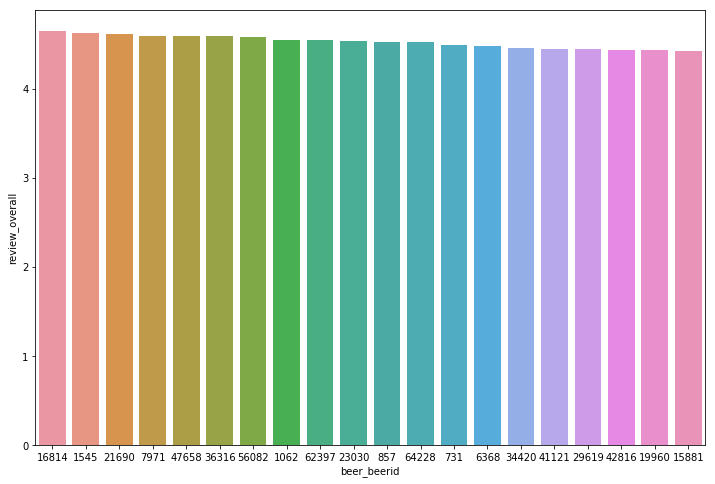

In [188]:
# 2. Visualise the rating values and notice:
# The average beer ratings

avg_ratings=beer5_df.groupby('beer_beerid').mean()

# Visualising only top 20 beers as there are more than 2,000 beers which would be diffficult to visualise in graph 
temp=avg_ratings.sort_values(by='review_overall',ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=temp.index,y=temp['review_overall'],order=temp['review_overall'].index)
plt.show()

# Beer id 16814 has the highest average beer rating of around 4.5

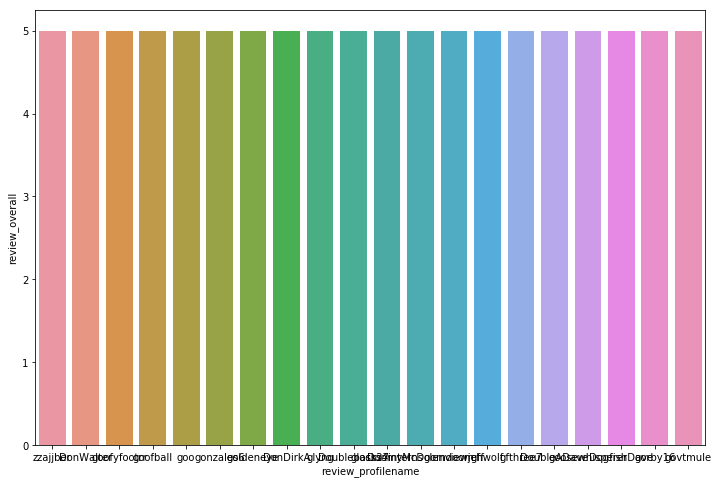

In [189]:
# The average User ratings

avg_user_ratings=beer5_df.groupby('review_profilename').mean()

# Visualising only first 20 users who have given highest rating on an average among all users, 
# as there are more than 19,000 users which would be diffficult to visualise in graph 

temp=avg_user_ratings.sort_values(by='review_overall',ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=temp.index,y=temp['review_overall'],order=temp['review_overall'].index)
plt.show()

# Looks like all 20 users have given an average rating of 5

In [190]:
# The average number of ratings given to the beers

# The below dataframe has total count of ratings by beer
number_of_ratings=beer5_df[['beer_beerid','review_profilename']].groupby('beer_beerid').count()
number_of_ratings.rename(columns={'review_profilename':'Count of ratings'},inplace=True) # renaming column

# The below command displays the average number of ratings given to a beer which is around 145.
np.mean(number_of_ratings['Count of ratings'])

145.06755424063115

In [191]:
# The average number of ratings given by the users

# The below dataframe has total count of ratings by user
user_number_of_ratings=beer5_df[['review_profilename','review_overall']].groupby('review_profilename').count()
user_number_of_ratings.rename(columns={'review_overall':'Count of ratings'},inplace=True) # renaming column

# The below command displays the average number of ratings given by a user which is around 15.
np.mean(user_number_of_ratings['Count of ratings'])

15.128143158327763

# 3. Recommendation Models

In [192]:
# Divide data into training and testing dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(beer5_df, test_size=0.30, random_state=31)

In [193]:
print(train.shape)
print(test.shape)

(205978, 3)
(88277, 3)


# USER BASED MODEL

In [194]:
# Pivot the dataframe to get all ratings with users by rows and beers by columns. Please note we are not filling up NaN with 0.
# This is done so that whilst finding cosine similarity, we dont consider the cells where ratings are not present for the beer.
train_pivot=train.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')

In [195]:
train_pivot.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Adjusted cosine similarity
# Normalise the rating for each user aroung 0 mean. This is done as all users wont use the same scale to rate a beer.
# One user might give rating as 3 for a good beer whereas another user might give rating 3 for a bad beer.
mean = np.nanmean(train_pivot, axis=1)
df_subtracted = (train_pivot.T-mean).T

In [197]:
# Now find cosine similarity using normalised data
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [198]:
user_correlation.shape

(17141, 17141)

In [199]:
# Determine how similar the first 10 users are to each other and visualise it.
# We can find how the first 10 users are related to each other by finding correlation metric for first 10 users
# Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 
# Printing correlation between first 10 users
print(user_correlation[0:10,0:10])

# From the below data, we can see user 1 & user 10 [-0.044] have really low negative correlation hence no correlation among them. 
# User 7 & User 10[-0.24] have low negative correlation as well, meaning they have little or no correlation.
# Also other users have no correlation.

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.         -0.04404923]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.          0.          0.         -0.24363687]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0

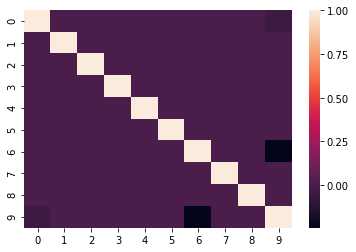

In [200]:
# visualising correlation between first 10 users using heatmap 
sns.heatmap(user_correlation[0:10,0:10])

In [201]:
# Prediction
# Below we are considering only the users who are positively corelated and ignore the users who are negatively related as we are
# interested only in the users who are similar to other users.
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [202]:
#Rating predicted for the user is the weighted sum of correlation with the other users rating as present in the dataset.
user_predicted_ratings = np.dot(user_correlation, train_pivot.fillna(0))
user_predicted_ratings

array([[1.11019219, 2.05792708, 2.09525026, ..., 0.78302987, 2.52730043,
        1.84826025],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.23789185, 4.22513003, 3.4036596 , ..., 2.18266277, 3.21351615,
        2.02176079],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.16436203, 4.2399078 , 3.14274597, ..., 0.80964496, 1.6681538 ,
        1.90630726]])

In [203]:
user_predicted_ratings.shape

(17141, 2028)

In [204]:
# Now we need to copy train data into dummy train dataframe so that we can use it for prediction. To ignore the beers rated by the user, we will mark it as 0 during prediction. 
#The beers not rated by user is marked as 1 for prediction. 
# Similarly dummy test will be used for evaluation and hence we will mark 1 for the beer which has been rated by the user.

In [205]:
# Copy train and test to dummy train and dummy test respectively
dummy_train = train.copy()
dummy_test = test.copy()

In [206]:
dummy_train.head() # View dummy train

,beer_beerid,review_profilename,review_overall
23510,2671,daliandragon,3.5
357975,9086,grittybrews,4.0
331776,4902,UncleJimbo,4.0
380141,1867,TheSupremeAJ,4.0
119411,1053,colts9016,2.5


In [207]:
# To ignore the beer rated by the reviewer, mark it as 0 during prediction. 
# The beer not rated by reviewer is marked as 1 for prediction.
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)

# For evaluation purpose, mark the beer which has been reviewed as 1 and vice versa.
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [208]:
# The beers not rated by reviewer is marked as 1 for prediction. 
dummy_train_pivot=dummy_train.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall',fill_value=1)

# The beers not rated by reviewer is marked as 0 for evaluation. 
dummy_test_pivot=dummy_test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall',fill_value=0)


In [209]:
dummy_train_pivot.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
01Ryan10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
04101Brewer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
05Harley,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0beerguy0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [210]:
# Now predict the  ratings for beers not rated by the user and mark the beer already rated by users as zero. 
# This is achieved by multiplying the user predicted ratings with dummy train
user_final_rating = np.multiply(user_predicted_ratings,dummy_train_pivot)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.110192,2.057927,2.095250,3.434283,0.466975,0.451660,1.606771,2.684301,6.334882,4.040745,...,1.608696,3.592220,4.645565,0.554555,0.547139,0.580467,0.368258,0.783030,2.527300,1.848260
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.183732,1.252216,1.531599,2.500829,0.346627,0.694916,2.429734,1.713951,5.949260,2.281917,...,0.239903,3.990110,4.813405,1.299582,0.390305,1.663907,1.296231,0.556572,2.501911,1.459540
0beerguy0,0.552443,1.347691,1.348018,1.833289,1.674326,0.095407,1.435503,1.331031,4.608042,3.519052,...,0.000000,0.195672,0.704374,0.719525,0.081950,0.446846,0.139621,0.303246,0.608197,0.249311


# BEER BASED MODEL

In [211]:
# Pivot the dataframe to get all ratings with beers by rows and users by columns. Please note we are not filling up NaN with 0.
# This is done so that whilst finding cosine similarity, we dont consider the cells where ratings are not present for the beer.
train_pivot=train.pivot_table(index='beer_beerid',columns='review_profilename',values='review_overall')
train_pivot.shape

(2028, 17141)

In [212]:
# Adjusted cosine similarity
# Normalise the rating of the beer around 0 mean. 
mean = np.nanmean(train_pivot, axis=1)
df_subtracted = (train_pivot.T-mean).T

In [213]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zuccard,zuffenhausen,zuggy9,zulufactor,zumicroom,zwan,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
from sklearn.metrics.pairwise import pairwise_distances

# Beer Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.02167138  0.05630218 ...  0.          0.02840308
   0.01141948]
 [ 0.02167138  1.          0.01110874 ... -0.00360922  0.
  -0.00281863]
 [ 0.05630218  0.01110874  1.         ...  0.          0.00479577
   0.01958493]
 ...
 [ 0.         -0.00360922  0.         ...  1.          0.00738136
  -0.01261381]
 [ 0.02840308  0.          0.00479577 ...  0.00738136  1.
  -0.00426094]
 [ 0.01141948 -0.00281863  0.01958493 ... -0.01261381 -0.00426094
   1.        ]]


In [215]:
# Determine how similar the first 10 beers are to each other and visualise it.
# We can find how the first 10 beers are related to each other by finding correlation metric for first 10 beers
# Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 
# Printing correlation between first 10 beers
print(item_correlation[0:10,0:10])

# Below data shows no correlation between top 10 beers.

[[ 1.00000000e+00  2.16713845e-02  5.63021756e-02 -2.86976321e-02
  -1.23986511e-02 -2.30234782e-02 -3.53780001e-02  7.81870740e-03
  -1.04172659e-02  1.51109720e-02]
 [ 2.16713845e-02  1.00000000e+00  1.11087390e-02  1.81280760e-02
  -3.31560717e-03  2.55827139e-02 -1.02688810e-02 -3.79144599e-02
  -4.27470726e-04  1.84348860e-03]
 [ 5.63021756e-02  1.11087390e-02  1.00000000e+00 -9.95892474e-03
  -4.78882631e-02 -2.62762293e-02  7.13787318e-03 -2.94803794e-02
   1.45299339e-02 -1.72915541e-02]
 [-2.86976321e-02  1.81280760e-02 -9.95892474e-03  1.00000000e+00
   0.00000000e+00 -5.14593980e-02 -1.12501243e-02  3.08946384e-03
   2.41040120e-02 -6.38547418e-03]
 [-1.23986511e-02 -3.31560717e-03 -4.78882631e-02  0.00000000e+00
   1.00000000e+00 -5.18351954e-03  3.29062900e-03  0.00000000e+00
   1.08668394e-03 -4.64869132e-02]
 [-2.30234782e-02  2.55827139e-02 -2.62762293e-02 -5.14593980e-02
  -5.18351954e-03  1.00000000e+00 -7.06762815e-03 -3.57340831e-03
   4.30512801e-02  6.57479649e-03

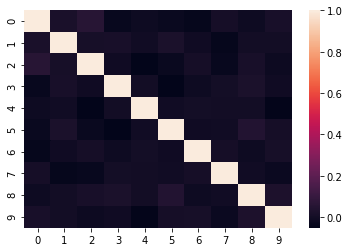

In [216]:
# Visualising correlation using heatmap as well
sns.heatmap(item_correlation[0:10,0:10])

In [217]:
# Prediction
# Below we are considering only the beers who are positively corelated and ignore the beers who are negatively related as we are
# interested only in the beers who are similar to other beers.
item_correlation[item_correlation<0]=0
item_correlation.shape

(2028, 2028)

In [218]:
#Rating predicted for the beer is the weighted sum of correlation with theother beers rating as present in the dataset. 
item_predicted_ratings = np.dot(item_correlation,train_pivot.fillna(0))
item_predicted_ratings

array([[0.53259867, 0.        , 0.        , ..., 0.00377773, 0.23524727,
        0.00278945],
       [0.73651332, 0.        , 0.12696436, ..., 0.01856882, 0.0320059 ,
        0.1614516 ],
       [0.86085262, 0.07954064, 0.10755533, ..., 0.06034295, 0.22476279,
        0.06640805],
       ...,
       [0.50588293, 0.        , 0.        , ..., 0.03897365, 0.1112149 ,
        0.        ],
       [0.71781857, 0.03515115, 0.01690774, ..., 0.04686754, 0.04063188,
        0.00087353],
       [0.34468347, 0.        , 0.06006954, ..., 0.1145868 , 0.        ,
        0.03658486]])

In [219]:
item_predicted_ratings.shape

(2028, 17141)

In [220]:
dummy_train_pivot.T.shape

(2028, 17141)

In [221]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train_pivot.T)
item_final_rating.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zuccard,zuffenhausen,zuggy9,zulufactor,zumicroom,zwan,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.532599,0.000000,0.000000,0.854326,0.295550,0.000000,0.201548,0.030410,0.000000,0.495751,...,0.049136,0.160478,0.513790,0.000877,0.000000,0.080618,0.822115,0.003778,0.235247,0.002789
6,0.736513,0.000000,0.126964,0.836186,0.012957,0.147713,0.481787,0.000000,0.000000,0.418968,...,0.000000,0.083403,0.227664,0.031164,0.000000,0.000000,0.913096,0.018569,0.032006,0.161452
7,0.860853,0.079541,0.107555,0.467582,0.085034,0.000000,0.418718,0.059551,0.000000,0.992134,...,0.033255,0.245924,0.202670,0.019686,0.004843,0.057918,1.225581,0.060343,0.224763,0.066408
10,0.534179,0.002949,0.040659,0.641102,0.078438,0.070419,0.330879,0.000000,0.266314,0.480727,...,0.003769,0.114425,0.558813,0.000000,0.000000,0.016930,0.518306,0.010684,0.000000,0.236080
14,0.426674,0.000000,0.000000,0.605973,0.142369,0.000000,0.212540,0.016480,0.000000,0.124012,...,0.000000,0.167709,0.198078,0.025157,0.000000,0.000000,0.347939,0.187824,0.042227,0.025651


# Evaluation

In [222]:
# User Similarity Model
test_pivot=test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')
# Adjusted cosine similarity
# Normalise the rating for each user aroung 0 mean.
mean = np.nanmean(test_pivot, axis=1)
df_subtracted = (test_pivot.T-mean).T
# User Similarity Matrix
testuser_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
testuser_correlation[np.isnan(testuser_correlation)] = 0
# Considering only the users who are positively corelated and ignore the users who are negatively related
testuser_correlation[testuser_correlation<0]=0
#Rating predicted for the user 
testuser_predicted_ratings = np.dot(testuser_correlation, test_pivot.fillna(0))
testuser_predicted_ratings

array([[0.13952257, 0.36480207, 0.09907162, ..., 0.02142782, 0.69745902,
        0.50450409],
       [0.5390836 , 2.20526415, 0.09474824, ..., 0.15152288, 1.2753599 ,
        0.68923138],
       [0.        , 0.24077171, 0.32300417, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [223]:
#Doing prediction for the beers rated by the user
test_user_final_rating = np.multiply(testuser_predicted_ratings,dummy_test_pivot)
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
#Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range.¶
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>=0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [225]:
test_=test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

# RMSE for user based similarity model is 0.095

0.09495746404268603


In [226]:
# Beer Similarity Model
test_pivot=test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').T
# Adjusted cosine similarity
# Normalise the rating for each beer aroung 0 mean.
mean = np.nanmean(test_pivot, axis=1)
df_subtracted = (test_pivot.T-mean).T
# Beer Similarity Matrix
testitem_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
testitem_correlation[np.isnan(testitem_correlation)] = 0
# Considering only the beers who are positively correlated and ignore the beers who are negatively correlated
testitem_correlation[testitem_correlation<0]=0
#Rating predicted for the beer 
testitem_predicted_ratings = np.dot(testitem_correlation, test_pivot.fillna(0))
testitem_predicted_ratings

array([[0.09693776, 0.10188012, 0.        , ..., 0.        , 0.        ,
        0.0066932 ],
       [0.15960904, 0.09240478, 0.04592244, ..., 0.03456195, 0.        ,
        0.        ],
       [0.07005984, 0.09125332, 0.02743906, ..., 0.03021159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02150666, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55078586, 0.02185895, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22263527, 0.40070796, 0.        , ..., 0.        , 0.        ,
        0.58214753]])

In [227]:
#Doing prediction
test_item_final_rating = np.multiply(testitem_predicted_ratings,dummy_test_pivot.T)
test_item_final_rating.head()

review_profilename,0110x011,05Harley,0tt0,1000Bottles,100floods,1099,11millsown113,11osixBrew,11thFloorBrewing,1229design,...,zuccard,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
#Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range.¶
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>=0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [229]:
test_=test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').T
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)


# RMSE for user based similarity model is 0.048

0.04813857612268249


# Compare the performance of the two models using test data and suggest the one that should be deployed.

# We saw previously that, RMSE for user based similarity model is 0.095 whereas now we saw that RMSE for item based similarity model is 0.048. Hence Item (Beer) based similarity model is better than user based as its RMSE is lesser.

In [232]:
# Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.
# Used based model
print(user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5])
print('____________')
print(user_final_rating.loc['genog'].sort_values(ascending=False)[0:5])
print('____________')
print(user_final_rating.loc['giblet'].sort_values(ascending=False)[0:5])

beer_beerid
2093    42.493549
412     40.624692
1093    36.300030
754     35.274549
1904    34.584823
Name: cokes, dtype: float64
____________
beer_beerid
1093    44.353881
412     43.817178
2093    42.642315
4083    39.566975
1013    39.038085
Name: genog, dtype: float64
____________
beer_beerid
2093    61.193542
104     57.410103
412     55.513368
34      55.292744
1093    53.069552
Name: giblet, dtype: float64


In [233]:
# Item(Beer) based model
print(item_final_rating['cokes'].sort_values(ascending=False)[0:5])
print('____________')
print(item_final_rating['genog'].sort_values(ascending=False)[0:5])
print('____________')
print(item_final_rating['giblet'].sort_values(ascending=False)[0:5])


beer_beerid
7879     10.867058
2147     10.743640
857      10.231089
29721     9.826314
33467     9.545574
Name: cokes, dtype: float64
____________
beer_beerid
16146    4.486431
1504     4.483465
13825    4.382216
26277    4.206105
7879     4.181446
Name: genog, dtype: float64
____________
beer_beerid
9410     3.519375
28578    3.477344
1655     3.274120
24905    3.265943
16146    3.207665
Name: giblet, dtype: float64
